# Audio Model

**Step 1: Import Libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import sklearn
import gc


# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2: Import Audio Data**

In [3]:
X_upsample= np.load(file="/content/drive/My Drive/X_upsample.npy")
Y_upsample= np.load(file="/content/drive/My Drive/Y_upsample.npy")
X_test= np.load(file="/content/drive/My Drive/X_test.npy")
Y_test= np.load(file="/content/drive/My Drive/Y_test.npy")

**Step 3: Audio Baseline -- CNN Audio Model**

In [4]:
def Thresholding(Y_pred, threshold):
  Y_pred2 = []
  print("Y_pred: ", Y_pred.shape)
  for i in range(len(Y_pred)):
    if(Y_pred[i] < threshold):
      Y_pred2.append(0)
    else:
      Y_pred2.append(1)

  return np.array(Y_pred2)

In [17]:
class CNN_audio:

  def __init__(self):
# Initialising the CNN
    classifier = Sequential()
# Step 1 - Convolution
    classifier.add(Conv1D(60, 10, input_shape = (40000, 74), activation = 'relu'))
# Step 2 - Pooling
    classifier.add(MaxPooling1D(pool_size = 3))
# Adding a second convolutional layer
    classifier.add(Conv1D(30, 5, activation = 'relu'))
    classifier.add(MaxPooling1D(pool_size = 3))
    classifier.add(Conv1D(15, 5, activation = 'relu'))
    classifier.add(MaxPooling1D(pool_size = 3))
# Step 3 - Flattening
    classifier.add(Flatten())
    classifier.add(Dropout(0.5))
# Step 4 - Full connection
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
# classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    self.classifier = classifier

  def modelFit(self, X, Y, epoch = 10):
    return self.classifier.fit(X, Y, epochs=epoch)

  def modelPredict(self, X):
    return self.classifier.predict(X)



**Step 4: Training and Testing**

Epoch 1/10
7/7 [==============================] - 3s 92ms/step - loss: 28.0973 - accuracy: 0.4800
Epoch 2/10
7/7 [==============================] - 1s 93ms/step - loss: 0.5830 - accuracy: 0.7150
Epoch 3/10
7/7 [==============================] - 1s 99ms/step - loss: 0.4625 - accuracy: 0.7800
Epoch 4/10
7/7 [==============================] - 1s 90ms/step - loss: 0.2477 - accuracy: 0.9350
Epoch 5/10
7/7 [==============================] - 1s 96ms/step - loss: 0.0896 - accuracy: 0.9700
Epoch 6/10
7/7 [==============================] - 1s 102ms/step - loss: 0.0463 - accuracy: 0.9850
Epoch 7/10
7/7 [==============================] - 1s 93ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 8/10
7/7 [==============================] - 1s 92ms/step - loss: 0.0118 - accuracy: 0.9950
Epoch 9/10
7/7 [==============================] - 1s 93ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 1s 90ms/step - loss: 0.0022 - accuracy: 1.0000


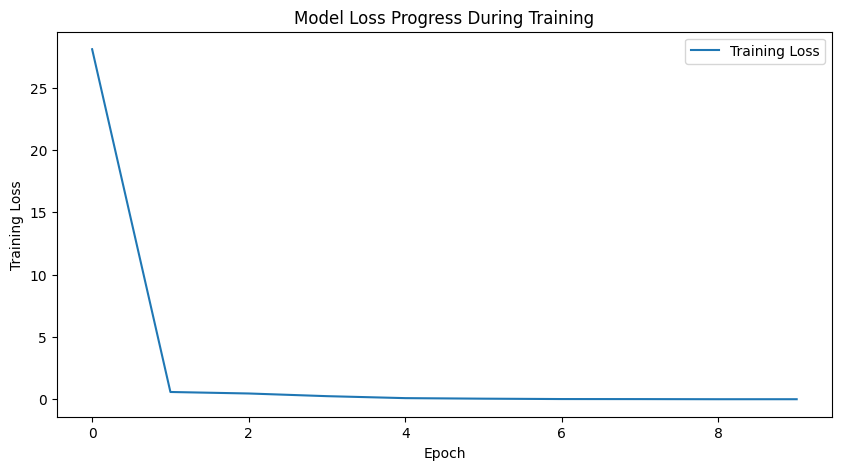

2/2 [==============================] - 1s 43ms/step
Y_pred:  (47, 1)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


model = CNN_audio()
history = model.modelFit(X_upsample, Y_upsample, 10)

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()


Y_pred = Thresholding(model.modelPredict(X_test), 0.8)


In [27]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score on test set: {f1:.2f}")


recall = recall_score(Y_test, Y_pred)
print(f"Recall on test set: {recall:.2f}")


precision = precision_score(Y_test, Y_pred)
print(f"Precision on test set: {precision:.2f}")

Accuracy on test set: 0.68
F1 Score on test set: 0.59
Recall on test set: 0.48
Precision on test set: 0.77


**Step 5: Audio Baseline -- BiLSTM Audio Model**

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten, Bidirectional

class BiLSTM_audio:

    def __init__(self):
        # Initialising the BiLSTM model
        classifier = Sequential()

        # Adding BiLSTM layers
        classifier.add(Bidirectional(LSTM(60, return_sequences=True), input_shape=(40000, 74)))
        classifier.add(Dropout(0.5))
        classifier.add(Bidirectional(LSTM(30, return_sequences=True)))
        classifier.add(Dropout(0.5))
        classifier.add(Bidirectional(LSTM(15)))
        classifier.add(Dropout(0.5))

        # Flattening (Not really necessary after LSTM as the output is already 2D, but it won't harm)
        classifier.add(Flatten())

        # Full connection
        classifier.add(Dense(units=128, activation='relu'))
        classifier.add(Dense(units=1, activation='sigmoid'))

        # Compiling the BiLSTM
        classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.classifier = classifier

    def modelFit(self, X, Y, epoch=10):
        return self.classifier.fit(X, Y, epochs=epoch)

    def modelPredict(self, X):
        return self.classifier.predict(X)


Epoch 1/10
7/7 [==============================] - 58s 5s/step - loss: 0.7001 - accuracy: 0.4550
Epoch 2/10
7/7 [==============================] - 40s 6s/step - loss: 0.6826 - accuracy: 0.5950
Epoch 3/10
7/7 [==============================] - 39s 6s/step - loss: 0.6604 - accuracy: 0.6750
Epoch 4/10
7/7 [==============================] - 38s 6s/step - loss: 0.6546 - accuracy: 0.6400
Epoch 5/10
7/7 [==============================] - 38s 5s/step - loss: 0.6119 - accuracy: 0.6900
Epoch 6/10
7/7 [==============================] - 38s 5s/step - loss: 0.5609 - accuracy: 0.7700
Epoch 7/10
7/7 [==============================] - 39s 5s/step - loss: 0.5031 - accuracy: 0.8100
Epoch 8/10
7/7 [==============================] - 38s 5s/step - loss: 0.4824 - accuracy: 0.8000
Epoch 9/10
7/7 [==============================] - 38s 6s/step - loss: 0.4402 - accuracy: 0.8250
Epoch 10/10
7/7 [==============================] - 39s 6s/step - loss: 0.3669 - accuracy: 0.8850


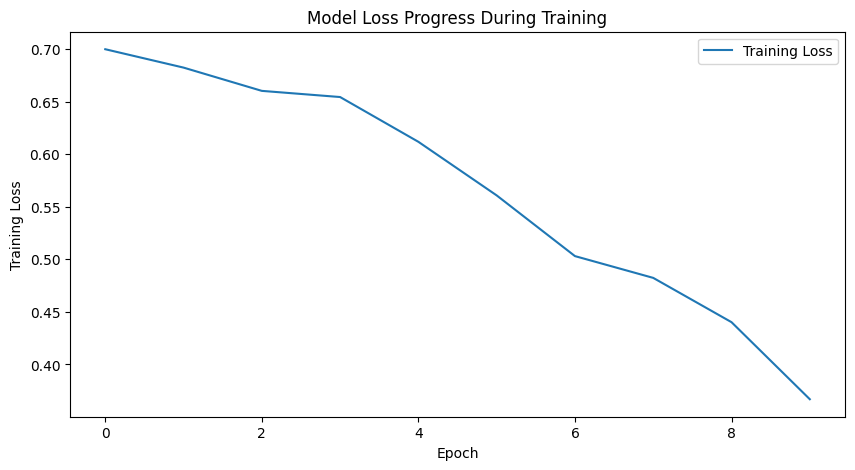

2/2 [==============================] - 6s 2s/step
Y_pred:  (47, 1)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Instantiate the LSTM model instead of CNN
model = BiLSTM_audio()

# Fit the model using the upsampled data
history = model.modelFit(X_upsample, Y_upsample, 10)

# Plotting the training loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

# Making predictions using a threshold of 0.8
Y_pred = Thresholding(model.modelPredict(X_test), 0.8)


In [8]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score on test set: {f1:.2f}")


recall = recall_score(Y_test, Y_pred)
print(f"Recall on test set: {recall:.2f}")


precision = precision_score(Y_test, Y_pred)
print(f"Precision on test set: {precision:.2f}")

Accuracy on test set: 0.65
F1 Score on test set: 0.45
Recall on test set: 0.42
Precision on test set: 0.50


**Step 5: CNN+BiLSTM Audio Model**

In [7]:
from tensorflow.keras.layers import Bidirectional, LSTM

class CNN_LSTM_audio:
    def __init__(self):
        # Initialising the CNN
        classifier = Sequential()
        # Step 1 - Convolution
        classifier.add(Conv1D(60, 10, input_shape = (40000, 74), activation = 'relu'))
        # Step 2 - Pooling
        classifier.add(MaxPooling1D(pool_size = 3))
        # Adding a second convolutional layer
        classifier.add(Conv1D(30, 5, activation = 'relu'))
        classifier.add(MaxPooling1D(pool_size = 3))
        classifier.add(Conv1D(15, 5, activation = 'relu'))
        classifier.add(MaxPooling1D(pool_size = 3))
        # Add LSTM Layer
        classifier.add(Bidirectional(LSTM(64, return_sequences=True)))

        # Step 3 - Flattening
        classifier.add(Flatten())
        classifier.add(Dropout(0.5))
        # Step 4 - Full connection
        classifier.add(Dense(units = 128, activation = 'relu'))
        classifier.add(Dense(units = 1, activation = 'sigmoid'))

        # Compiling the CNN
        classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
        self.classifier = classifier

    def modelFit(self, X, Y, epoch = 10):
        return self.classifier.fit(X, Y, epochs=epoch)

    def modelPredict(self, X):
        return self.classifier.predict(X)




**Step 6: Training and Testing**

Epoch 1/10
7/7 [==============================] - 6s 174ms/step - loss: 13.6087 - accuracy: 0.4900
Epoch 2/10
7/7 [==============================] - 1s 169ms/step - loss: 10.7306 - accuracy: 0.4650
Epoch 3/10
7/7 [==============================] - 1s 170ms/step - loss: 2.0731 - accuracy: 0.5600
Epoch 4/10
7/7 [==============================] - 1s 173ms/step - loss: 0.7580 - accuracy: 0.6350
Epoch 5/10
7/7 [==============================] - 1s 167ms/step - loss: 0.3595 - accuracy: 0.8500
Epoch 6/10
7/7 [==============================] - 1s 170ms/step - loss: 0.1668 - accuracy: 0.9400
Epoch 7/10
7/7 [==============================] - 1s 173ms/step - loss: 0.0971 - accuracy: 0.9850
Epoch 8/10
7/7 [==============================] - 1s 169ms/step - loss: 0.0821 - accuracy: 0.9850
Epoch 9/10
7/7 [==============================] - 1s 165ms/step - loss: 0.0378 - accuracy: 0.9950
Epoch 10/10
7/7 [==============================] - 1s 168ms/step - loss: 0.0265 - accuracy: 0.9950


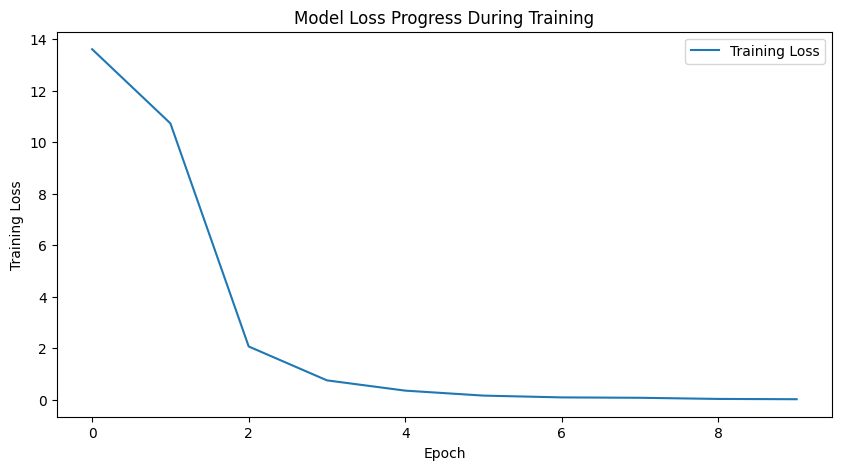

2/2 [==============================] - 1s 75ms/step
Y_pred:  (47, 1)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


model = CNN_LSTM_audio()
history = model.modelFit(X_upsample, Y_upsample, 10)


plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()


Y_pred = Thresholding(model.modelPredict(X_test), 0.8)


In [28]:
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")
# F1-Score
f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score on test set: {f1:.2f}")

# Recall
recall = recall_score(Y_test, Y_pred)
print(f"Recall on test set: {recall:.2f}")

# Precision
precision = precision_score(Y_test, Y_pred)
print(f"Precision on test set: {precision:.2f}")

Accuracy on test set: 0.72
F1 Score on test set: 0.61
Recall on test set: 0.52
Precision on test set: 10.75
